<a href="https://colab.research.google.com/github/EduardoWS/Calculo-Numerico/blob/main/EduardoRibeiroRodrigues_13696679_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1  Sistemas Lineares com Matrizes Simétricas**

###**1) Considere a matriz *A* e o vetor b dados abaixo**

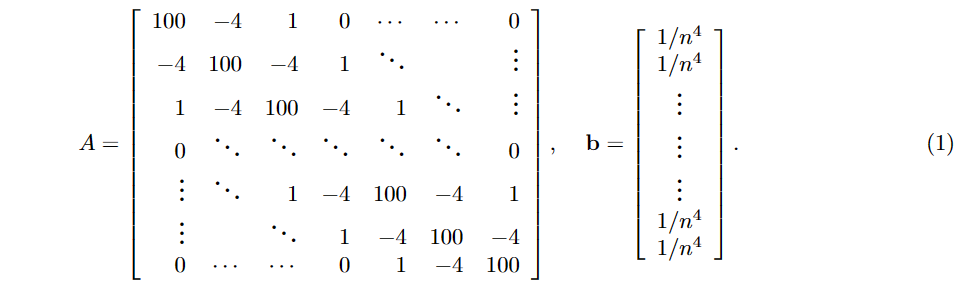

###**Seja *n* a dimensão do problema.** 

a)  Escreva um código que monte a matriz *A* para *n* = 1000.

In [111]:
#imports
import numpy as np

#contantes
N = 1000              


In [112]:
def montar_matriz(N):
    A = np.eye(N) * 100

    # Atualiza os vizinhos da diagonal principal com o valor -4
    for i in range(N):
        if i > 0:
            A[i, i-1] = -4  # Vizinho à esquerda
        if i < N-1:
            A[i, i+1] = -4  # Vizinho à direita

    # Atualiza os vizinhos de -4 para 1
    for i in range(N):
        if i > 0:
            if A[i, i-1] == -4:
                if i-1 < 0 or i == 1:
                    pass
                else:
                    A[i, i-2] = 1  # Vizinho à esquerda
                
        if i < N-1:
            if A[i, i+1] == -4:
                if i+1 >= N-1:
                    pass
                else:
                    A[i, i+2] = 1  # Vizinho à direita
    return A


In [113]:
A = montar_matriz(10)

print("EXEMPLO COM N = 10:\n")
print(A)

EXEMPLO COM N = 10:

[[100.  -4.   1.   0.   0.   0.   0.   0.   0.   0.]
 [ -4. 100.  -4.   1.   0.   0.   0.   0.   0.   0.]
 [  1.  -4. 100.  -4.   1.   0.   0.   0.   0.   0.]
 [  0.   1.  -4. 100.  -4.   1.   0.   0.   0.   0.]
 [  0.   0.   1.  -4. 100.  -4.   1.   0.   0.   0.]
 [  0.   0.   0.   1.  -4. 100.  -4.   1.   0.   0.]
 [  0.   0.   0.   0.   1.  -4. 100.  -4.   1.   0.]
 [  0.   0.   0.   0.   0.   1.  -4. 100.  -4.   1.]
 [  0.   0.   0.   0.   0.   0.   1.  -4. 100.  -4.]
 [  0.   0.   0.   0.   0.   0.   0.   1.  -4. 100.]]


In [114]:
A = montar_matriz(N)

print("EXEMPLO COM N = 1000:\n")
print(A)

EXEMPLO COM N = 1000:

[[100.  -4.   1. ...   0.   0.   0.]
 [ -4. 100.  -4. ...   0.   0.   0.]
 [  1.  -4. 100. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 100.  -4.   1.]
 [  0.   0.   0. ...  -4. 100.  -4.]
 [  0.   0.   0. ...   1.  -4. 100.]]


<hr>

b) Escreva um código que faça a decomposição de Cholesky de uma matriz simétrica definida positiva qualquer.

In [115]:
# Exemplo de matriz A simétrica definida positiva
A = np.array([[9, 2, 1],
              [2, 5, 2],
              [1, 2, 6]])

# Vetor x
x = np.array([1, 2, 3])

# Vetor b
b = np.dot(A, x)

print("Matriz A:")
print(A)
print("\nVetor x:")
print(x)
print("\nVetor b:")
print(b)

Matriz A:
[[9 2 1]
 [2 5 2]
 [1 2 6]]

Vetor x:
[1 2 3]

Vetor b:
[16 18 23]


In [116]:
# EXEMPLO USANDO FUNÇÕES DO PYTHON
from scipy.linalg import cholesky, solve_triangular

A = np.array([[9, 2, 1],
              [2, 5, 2],
              [1, 2, 6]])

b = [16, 18, 23]

L = cholesky(A, lower=True)
y = solve_triangular(L, b, lower=True)
x = solve_triangular(L.T, y, lower=False)

print("A solução do sistema é:")
print(x)

A solução do sistema é:
[1. 2. 3.]


In [117]:
def cholesky_decomposition(A):
    """
    Realiza a decomposição de Cholesky de uma matriz simétrica definida positiva A.
    Retorna a matriz triangular inferior L.
    """
    n = A.shape[0]
    L = np.zeros_like(A, dtype=float)

    for i in range(n):
        for j in range(i + 1):
            if i == j:
                L[i, i] = np.sqrt(A[i, i] - np.dot(L[i, :i], L[i, :i]))
            else:
                L[i, j] = (A[i, j] - np.dot(L[i, :j], L[j, :j])) / L[j, j]

    return L

In [118]:
def solve_triangular_lower(L, b):
    """
    Resolve um sistema triangular inferior Ly = b, onde L é uma matriz triangular inferior e b é um vetor.
    Retorna o vetor y, que é a solução do sistema.
    """
    n = len(b)
    y = np.zeros(n)

    for i in range(n):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]

    return y

def solve_triangular_upper(U, b):
    """
    Resolve um sistema triangular superior Ux = b, onde U é uma matriz triangular superior e b é um vetor.
    Retorna o vetor x, que é a solução do sistema.
    """
    n = len(b)
    x = np.zeros(n)

    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]

    return x

In [119]:
# Mesmo exemplo sem utilizar funções prontas:
A = np.array([[9, 2, 1],
              [2, 5, 2],
              [1, 2, 6]])

b = [16, 18, 23]

'''
 Lembrando que A = H*H^T e que Ax = b
 Então: (H*H^T)x = b
        H*(H^Tx) = b
    =>  (H^T)x = y
    =>  Hy = b

'''

# Calculando a decomposição de Cholesky da matriz A:
H = cholesky_decomposition(A)

# Resolvendo o sistema triangular inferior Hy = b:
y = solve_triangular_lower(H, b)

# Resolvendo o sistema triangular superior H^T x = y:
x = solve_triangular_upper(H.T, y)

print("A solução do sistema é:")
print(x)

A solução do sistema é:
[1. 2. 3.]


<hr>

c)  Usando as rotinas implementadas anteriormente, escreva um código para resolver um sistema Ax=b

In [120]:
# Exemplo para n = 10:
n = 10

A = montar_matriz(n)
b = np.ones(n)/n**(4)

print(A)
print()
print(b)

[[100.  -4.   1.   0.   0.   0.   0.   0.   0.   0.]
 [ -4. 100.  -4.   1.   0.   0.   0.   0.   0.   0.]
 [  1.  -4. 100.  -4.   1.   0.   0.   0.   0.   0.]
 [  0.   1.  -4. 100.  -4.   1.   0.   0.   0.   0.]
 [  0.   0.   1.  -4. 100.  -4.   1.   0.   0.   0.]
 [  0.   0.   0.   1.  -4. 100.  -4.   1.   0.   0.]
 [  0.   0.   0.   0.   1.  -4. 100.  -4.   1.   0.]
 [  0.   0.   0.   0.   0.   1.  -4. 100.  -4.   1.]
 [  0.   0.   0.   0.   0.   0.   1.  -4. 100.  -4.]
 [  0.   0.   0.   0.   0.   0.   0.   1.  -4. 100.]]

[0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]


In [121]:
# Calculando a decomposição de Cholesky da matriz A:
H = cholesky_decomposition(A)

# Resolvendo o sistema triangular inferior Hy = b:
y = solve_triangular_lower(H, b)

# Resolvendo o sistema triangular superior H^T x = y:
x = solve_triangular_upper(H.T, y)

print("A solução do sistema é:")
print(x)

A solução do sistema é:
[1.03228419e-06 1.07323449e-06 1.06451885e-06 1.06376302e-06
 1.06382052e-06 1.06382052e-06 1.06376302e-06 1.06451885e-06
 1.07323449e-06 1.03228419e-06]


In [122]:
# Para n = 1000
A = montar_matriz(N)
b = np.ones(N)/N**(4)

# Calculando a decomposição de Cholesky da matriz A:
H = cholesky_decomposition(A)

# Resolvendo o sistema triangular inferior Hy = b:
y = solve_triangular_lower(H, b)

# Resolvendo o sistema triangular superior H^T x = y:
x = solve_triangular_upper(H.T, y)

print("A solução do sistema é:")
print(x)

A solução do sistema é:
[1.03228419e-14 1.07323449e-14 1.06451885e-14 1.06376292e-14
 1.06382023e-14 1.06383008e-14 1.06382989e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14


<hr>

d)  Escreva um código implementando o método de Jacobi para resolver um sistema Ax=b.  Utilize o erro absoluto como critério de parada.

In [123]:
def jacobi(A, b, max_itr=100, tol=1e-6):
    """
    Resolve um sistema linear Ax = b utilizando o método de Jacobi.
    Retorna o vetor x, que é a solução do sistema.
    """
    n = len(b)
    x = np.zeros(n)
    x_prev = np.zeros(n)
    iterations = 0

    while iterations < max_itr:
        for i in range(n):
            x[i] = (b[i] - np.dot(A[i, :i], x_prev[:i]) - np.dot(A[i, i+1:], x_prev[i+1:])) / A[i, i]

        
        #print("xk = ",x)

        error = np.linalg.norm(x - x_prev, ord=np.inf)  # erro absoluto
        print(f"Iteração {iterations}: {error}")
        if error < tol:
            break
        
        x_prev = x.copy()
        iterations += 1

    print(f"\nErro = {error}")
    print()
    return x, iterations

In [124]:
# Exemplo
A = np.array([[10, 2,  1],
              [ 1, 5,  1],
              [ 2, 3, 10]])

b = np.array([7, -8, 6])

x, iterations = jacobi(A,b, 10, 0.01)
print("x =",x)

Iteração 0: 1.6
Iteração 1: 0.3400000000000001
Iteração 2: 0.1200000000000001
Iteração 3: 0.032399999999999984
Iteração 4: 0.010760000000000103
Iteração 5: 0.0035240000000000826

Erro = 0.0035240000000000826

x = [ 1.000236 -1.998936  1.000284]


<hr>

e)  Vamos comparar o método direto de Cholesky com o iterativo de Jacobi neste exemplo.  Observe quanto tempo leva para resolver o sistema usando Cholesky.  Quantas iterações foram necessárias no método de Jacobi para obtermos a mesma precisão da solução dada pelo método de Cholesky ?

In [125]:
import time

# Para n = 1000
A = montar_matriz(N)
b = np.ones(N)/N**(4)

inicio = time.time()    # inicia o cronometro

# Calculando a decomposição de Cholesky da matriz A:
H = cholesky_decomposition(A)

# Resolvendo o sistema triangular inferior Hy = b:
y = solve_triangular_lower(H, b)

# Resolvendo o sistema triangular superior H^T x = y:
x_cholesky = solve_triangular_upper(H.T, y)

fim = time.time()   # desliga o cronometro
tempo_total_cholesky = fim - inicio

erro_chol = np.linalg.norm(np.matmul(A, x_cholesky) - b)
print(f"Erro da solução pelo método de Cholesky: {erro_chol}" )

print("Tempo total de execução: %.6f segundos" % tempo_total_cholesky)

Erro da solução pelo método de Cholesky: 6.402114392106387e-27
Tempo total de execução: 0.904920 segundos


In [126]:
# Calculando a decomposição com o método de Jacobi usando o erro de cholesky:

# Para N = 1000
A = montar_matriz(N)
b = np.ones(N)/N**(4)

inicio = time.time()    # inicia o cronometro
x_jacobi, iterations = jacobi(A, b, 100, erro_chol)

fim = time.time()   # desliga o cronometro
tempo_total_jacobi = fim - inicio

print("Tempo total de execução: %.6f segundos" % tempo_total_jacobi)

Iteração 0: 1e-14
Iteração 1: 7.000000000000011e-16
Iteração 2: 4.299999999999695e-17
Iteração 3: 2.5000000000011253e-18
Iteração 4: 1.6180000000084604e-19
Iteração 5: 1.0188000000690095e-20
Iteração 6: 6.453100009203808e-22
Iteração 7: 4.453699938282311e-23
Iteração 8: 2.9250268167998523e-24
Iteração 9: 2.232492138993568e-25
Iteração 10: 1.6367286061525553e-26
Iteração 11: 1.3300194862026259e-27

Erro = 1.3300194862026259e-27

Tempo total de execução: 0.098724 segundos


In [127]:
# Precisão da solução de Jacobi em relação a Cholesky
precision = np.linalg.norm(x_jacobi - x_cholesky, ord=np.inf)

print(f"Tempo de execução (Cholesky): {tempo_total_cholesky:.6f} segundos")
print(f"Tempo de execução (Jacobi): {tempo_total_jacobi:.6f} segundos")
print(f"Precisão da solução de Jacobi em relação a Cholesky: {precision}")
print(f"Número de iterações do método de Jacobi: {iterations+1}")

Tempo de execução (Cholesky): 0.904920 segundos
Tempo de execução (Jacobi): 0.098724 segundos
Precisão da solução de Jacobi em relação a Cholesky: 1.0570736129961558e-28
Número de iterações do método de Jacobi: 12


<hr>

f) É possível melhorar a implementação da decomposição de Cholesky para o exemplo em questão ?

In [128]:
'''
    A matriz do exemplo possui muitos zeros, o que poderíamos evitar
    para deixar a implementação mais eficiente neste caso.

    Para melhorar as funções e evitar o cálculo dos zeros na matriz, 
    podemos fazer as seguintes alterações:

    Cholesky:
    Em vez de inicializar a matriz L com zeros, podemos criar uma matriz 
    triangular inferior vazia inicialmente e preencher apenas os elementos 
    necessários à medida que calculamos.
    Em cada iteração do loop, verifiquemos se o elemento A[i, j] é diferente 
    de zero antes de calcular L[i, j]. Se for zero, podemos pular o cálculo 
    desse elemento, já que o resultado será zero.
'''

# Versão atualizada da função cholesky_decomposition:
def cholesky_decomposition_updated(A):
    """
    Realiza a decomposição de Cholesky de uma matriz simétrica definida positiva A.
    Retorna a matriz triangular inferior L.
    """
    n = A.shape[0]
    L = np.zeros((n, n), dtype=float)

    for i in range(n):
        for j in range(i + 1):
            if A[i, j] != 0:
                if i == j:
                    L[i, i] = np.sqrt(A[i, i] - np.dot(L[i, :i], L[i, :i]))
                else:
                    L[i, j] = (A[i, j] - np.dot(L[i, :j], L[j, :j])) / L[j, j]

    return L

In [129]:
'''
    Solve Triangular Lower:
    Assim como na função cholesky_decomposition, podemos verificar se o 
    elemento L[i, :i] é diferente de zero antes de calcular o produto interno 
    np.dot(L[i, :i], y[:i]). Se for zero, o resultado será zero, então 
    podemos pular o cálculo desse termo.
'''

# Versão atualizada da função solve_triangular_lower:
def solve_triangular_lower_updated(L, b):
    """
    Resolve um sistema triangular inferior Ly = b, onde L é uma matriz triangular inferior e b é um vetor.
    Retorna o vetor y, que é a solução do sistema.
    """
    n = len(b)
    y = np.zeros(n)

    for i in range(n):
        # verifica se há pelo menos um elemento diferente de zero
        if L[i, :i].any():
            y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]

    return y

# Versão atualizada da função solve_triangular_upper, aplicando a mesma 
# modificação para evitar cálculos desnecessários:
def solve_triangular_upper_updated(U, b):
    """
    Resolve um sistema triangular superior Ux = b, onde U é uma matriz triangular superior e b é um vetor.
    Retorna o vetor x, que é a solução do sistema.
    """
    n = len(b)
    x = np.zeros(n)

    for i in range(n - 1, -1, -1):
        # verifica se há pelo menos um elemento diferente de zero
        if U[i, i+1:].any():    
            x[i] = (b[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]

    return x

In [130]:
import time

# ============== Cholesky ==============
A = montar_matriz(N)
b = np.ones(N)/N**(4)

inicio = time.time()

H = cholesky_decomposition(A)
y = solve_triangular_lower(H, b)
x_cholesky = solve_triangular_upper(H.T, y)

tempo_total_cholesky = time.time() - inicio


# ============== Cholesky Updated ==============
A = montar_matriz(N)
b = np.ones(N)/N**(4)

inicio = time.time()   

H = cholesky_decomposition_updated(A)
y = solve_triangular_lower_updated(H, b)
x_cholesky = solve_triangular_upper_updated(H.T, y)

tempo_total_cholesky_updated = time.time() - inicio




print(f"Tempo total Cholesky: {tempo_total_cholesky:.6f} segundos")
print(f"Tempo total Cholesky Updated: {tempo_total_cholesky_updated:.6f} segundos")

Tempo total Cholesky: 0.927127 segundos
Tempo total Cholesky Updated: 0.161299 segundos


<hr>

# **2    Método de Newton Para Sistemas Não-Lineares**

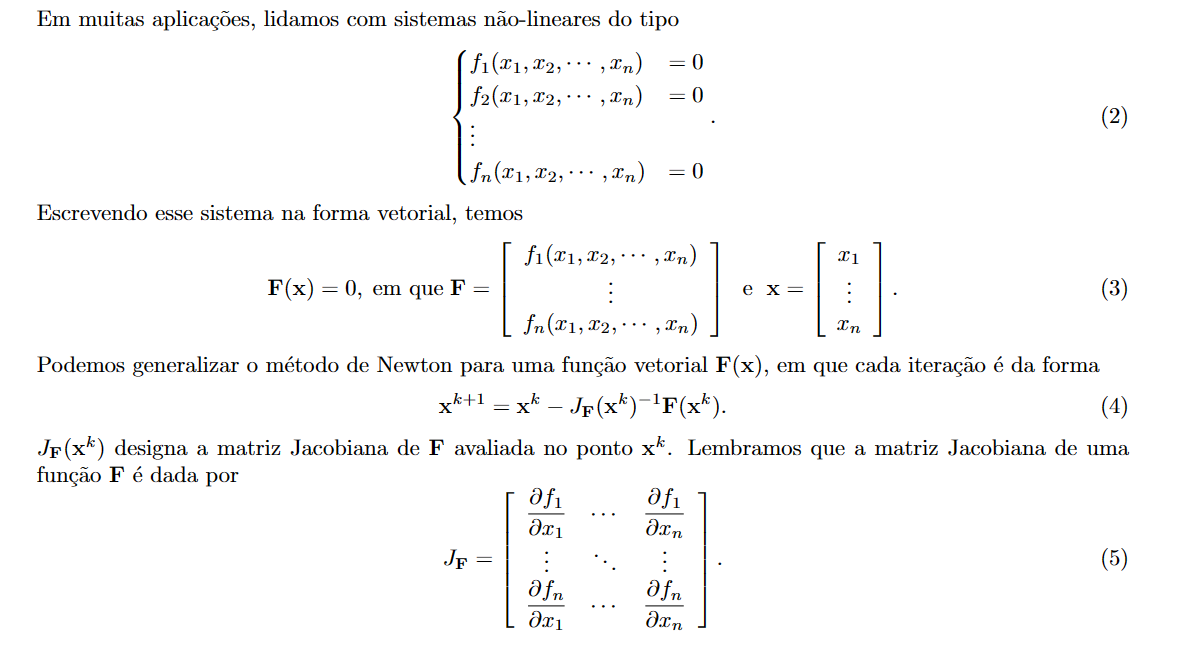

###**1)  Observando  a  equação (4),  vê-se  a  necessidade  de  calcular  a  matriz  inversa  da  Jacobiana. É possível calcular matrizes inversas usando a decomposição LU, sendo assim, implemente um código que:**

a)  Calcule a fatoração LU de uma matriz qualquer; 

In [131]:
import numpy as np

def LU(A):
    """
    Realiza a fatoração LU de uma matriz A.
    Retorna as matrizes L e U.
    """
    n = A.shape[0]
    L = np.eye(n)  # Inicializa a matriz L como uma matriz identidade
    U = np.copy(A)  # Inicializa a matriz U como uma cópia da matriz A

    for k in range(n - 1):
        for i in range(k + 1, n):
            factor = U[i, k] / U[k, k]
            L[i, k] = factor  # Atualiza o valor em L
            for j in range(k, n):
                U[i, j] -= factor * U[k, j]  # Atualiza os valores em U

    return L, U


def solve_lu(L, U, b):
    """
    Resolve um sistema linear usando a fatoração LU.
    Retorna a solução x.
    """
    n = len(b)
    y = np.zeros(n)
    x = np.zeros(n)

    # Resolve Ly = b (sistema triangular inferior)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])

    # Resolve Ux = y (sistema triangular superior)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]

    return x

In [132]:
# Exemplo de uso
A = np.array([[2, -1, 0], [-4, 6, 3], [-4, -2, 8]])
x = np.array([1, 2, 3])

b = np.dot(A, x)

print("Matriz A:")
print(A)
print("\nVetor b:")
print(b)

L, U = LU(A)
x = solve_lu(L, U, b)

print("\nSolução x:")
print(x)

Matriz A:
[[ 2 -1  0]
 [-4  6  3]
 [-4 -2  8]]

Vetor b:
[ 0 17 16]

Solução x:
[1. 2. 3.]


<hr>

b)  Resolva um sistema linear cujo lado direito é uma matriz;

In [133]:
# Adaptação para o caso em que b é uma matriz:
def solve_lu_B(L, U, b):
    """
    Resolve um sistema linear usando a fatoração LU.
    Retorna a matriz de soluções X.
    """
    n = len(b)
    m = b.shape[1]  # Número de colunas em b
    x = np.zeros((n, m))

    for col in range(m):
        y = np.zeros(n)

        # Resolve Ly = b[:, col] (sistema triangular inferior)
        for i in range(n):
            y[i] = b[i, col] - np.dot(L[i, :i], y[:i])

        # Resolve Ux = y (sistema triangular superior)
        for i in range(n - 1, -1, -1):
            x[i, col] = (y[i] - np.dot(U[i, i+1:], x[i+1:, col])) / U[i, i]

    return x

In [134]:
# Exemplo de uso
A = np.array([[2, -1, 0], [-4, 6, 3], [-4, -2, 8]])
B = np.array([[1, 2], [3, 4], [5, 6]])

L, U = LU(A)
X = solve_lu_B(L, U, B)

print("Matriz A:")
print(A)
print("\nMatriz B:")
print(B)
print("\nMatriz de soluções X:")
print(X)

Matriz A:
[[ 2 -1  0]
 [-4  6  3]
 [-4 -2  8]]

Matriz B:
[[1 2]
 [3 4]
 [5 6]]

Matriz de soluções X:
[[0.71590909 1.38636364]
 [0.43181818 0.77272727]
 [1.09090909 1.63636364]]


<hr>

c)  Finalmente, calcule a inversa de uma matriz qualquer resolvendo vários sistemas lineares.

In [135]:
'''
    Para calcularmos a inversa de uma matriz A, bastaria utilizarmos a 
    função solve_lu_B, sendo B uma matriz identidade.

    Lembrando que: AA^-1 = I
'''

A = np.array([[1, 2, 3],
              [0, 1, 4],
              [0, 0, 1]])
B = np.eye(3)

L, U = LU(A)
X = solve_lu_B(L, U, B)

print("Matriz A:")
print(A)
print("\nMatriz identidade B:")
print(B)
print("\nInversa da matriz A:")
print(X)

Matriz A:
[[1 2 3]
 [0 1 4]
 [0 0 1]]

Matriz identidade B:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Inversa da matriz A:
[[ 1. -2.  5.]
 [ 0.  1. -4.]
 [ 0.  0.  1.]]


In [136]:
'''
    Outra forma de fazer isso seria criar uma função própria para se calcular
    a função da inversa.
'''

def inverse(A):
    """
    Calcula a inversa de uma matriz A.
    Retorna a matriz inversa de A.
    """
    n = A.shape[0]
    identity = np.eye(n)  # Matriz identidade

    L, U = LU(A)
    inv_A = np.zeros_like(A)

    for i in range(n):
        inv_A[:, i] = solve_lu(L, U, identity[:, i])    # utilizando a função antiga

    return inv_A

In [137]:
# Exemplo de uso
A = np.array([[1, 2, 3],
              [0, 1, 4],
              [0, 0, 1]])

inv_A = inverse(A)

print("Matriz A:")
print(A)
print("\nMatriz Inversa de A:")
print(inv_A)

Matriz A:
[[1 2 3]
 [0 1 4]
 [0 0 1]]

Matriz Inversa de A:
[[ 1 -2  5]
 [ 0  1 -4]
 [ 0  0  1]]


<hr>

###**2) Implemente o método de Newton para sistemas usando a rotina implementada no item anterior. Lembre-se de especificar o critério de parada utilizado.**

In [138]:
def jacobiana(f, x):
    """
    Calcula a matriz jacobiana de uma função f em um ponto x.
    Retorna a matriz jacobiana.
    """
    n = len(x)
    J = np.zeros((n, n))

    h = 1e-8  # Valor pequeno para diferenciar as variáveis
    fx = np.array(f(x))  # Converter a lista para um numpy array

    for i in range(n):
        x_h = x.copy()
        x_h[i] += h
        fx_h = np.array(f(x_h))  # Converter a lista para um numpy array
        J[:, i] = (fx_h - fx) / h

    return J

In [139]:
def newton(F, x0, tol=1e-6, max_iter=100):
    """
    Resolve um sistema não linear usando o método de Newton.
    
    Parâmetros:
        - F: função que define o sistema não linear F(x) = 0. Recebe um vetor x e retorna um vetor.
        - x0: vetor inicial de estimativas.
        - tol: tolerância para critério de parada (opcional, padrão = 1e-6).
        - max_iter: número máximo de iterações (opcional, padrão = 100).
        
    Retorna:
        - x: vetor que aproxima a solução do sistema.
        - num_iter: número de iterações realizadas.
    """
    x = x0
    num_iter = 0

    while num_iter < max_iter:
        J = jacobiana(F, x)
        J_inv = inverse(J)
        delta_x = -np.dot(J_inv, F(x))
        x += delta_x
        num_iter += 1

        if np.linalg.norm(delta_x) < tol:
            break

    return x, num_iter

In [140]:
# Exemplo de uso
def system_equations(x):
    """
    Define o sistema de equações não lineares.
    Retorna um vetor com as equações do sistema.
    """
    f1 = x[0] + x[1]**2 - 4
    f2 = x[0] * x[1] - 1
    return np.array([f1, f2])


x0 = np.array([1.0, 1.0])  # Valor inicial

solution, iterations = newton(system_equations, x0)

print("Solução:")
print(solution)
print("\nIterações:", iterations)


Solução:
[0.53740158 1.86080585]

Iterações: 6


<hr>

Calcular  inversas  de  matrizes  é  um  processo  que  demanda  muito  custo  computacional  (como  pode  ser observado nos itens anteriores, precisa-se de uma fatoração LU e da resolução de vários sistemas lineares).  Por isso, ao usar o método de Newton para sistemas, faz-se algumas manipulações na equação  "x^(k+1)=x^k−JF(x^k)^(−1)F(x^k)" evitando o cálculo da inversa da matriz Jacobiana.  Define-se um vetor z=x^(k+1)−x^k e resolve-se o sistema linear JF(x^k)z=F(x^k). Deste modo, o algoritmo para resolver um sistema de equações não-lineares usando o método de Newton é : 

 1.  Numa dada iteração k, resolve-se o sistema JF(x^k)z=F(x^k),
 2.  Atualiza-se x^(k+1)=x^(k)−z.

###**3) Implemente novamente o método de Newton para sistemas usando o algoritmo anterior. Utilize as rotinas já implementadas neste trabalho para resolução do sistema linear, indicando sempre qual está usando.**

In [141]:
def newton_updated(f, x0, tol=1e-6, max_iter=100):
    """
    Resolve um sistema de equações não lineares usando o método de Newton.
    Retorna a solução do sistema.

    Parâmetros:
        - f: Função que define o sistema de equações não lineares. Deve receber 
        um vetor x e retornar um vetor com as equações do sistema.
        - x0: Valor inicial para as variáveis do sistema.
        - tol: Tolerância para critério de parada. O algoritmo será interrompido 
        quando a norma do incremento for menor que tol.
        - max_iter: Número máximo de iterações permitidas.

    Retorna:
        - x: Vetor com a solução do sistema de equações.
        - num_iter: número de iterações realizadas.

    """

    x = np.array(x0, dtype=float)  # Inicializa o vetor x como float
    n = len(x)  
    num_iter = 0

    while num_iter < max_iter:
        fx = np.array(f(x))  # Converter a lista para um numpy array
        J = jacobiana(f, x)  # Calcula a matriz jacobiana no ponto x

        L, U = LU(J)  # Realiza a fatoração LU da matriz jacobiana
        delta_x = solve_lu(L, U, -fx)  # Resolve o sistema linear J * delta_x = -f(x)

        x += delta_x  
        num_iter += 1

        if np.linalg.norm(delta_x) < tol:  # Verifica o critério de parada
            break

    return x, num_iter

In [142]:
# Exemplo de uso
def system_equations(x):
    """
    Define o sistema de equações não lineares.
    Retorna um vetor com as equações do sistema.
    """
    f1 = x[0] + x[1]**2 - 4
    f2 = x[0] * x[1] - 1
    return np.array([f1, f2])


x0 = np.array([1.0, 1.0])  # Valor inicial

solution, iterations = newton_updated(system_equations, x0)

print("Solução:")
print(solution)
print("\nIterações:", iterations)

Solução:
[0.53740158 1.86080585]

Iterações: 6


<hr>

###**4) Dada a equação de um círculo(x−a)^2 + (y−b)^2 = R^2 e três pontos que passam por esse círculo**

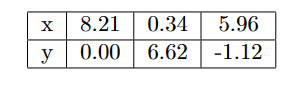

a)  Monte um sistema não-linear para determinar a, b e R. 

In [ ]:
'''
    Para determinar os parâmetros do círculo (a, b e R), podemos usar as três 
    equações geradas pelos três pontos que passam pelo círculo. Substituindo 
    as coordenadas (x, y) dos pontos nas equações do círculo, obtemos o 
    seguinte sistema não linear:

    Equação 1: (x1 - a)^2 + (y1 - b)^2 = R^2
    Equação 2: (x2 - a)^2 + (y2 - b)^2 = R^2
    Equação 3: (x3 - a)^2 + (y3 - b)^2 = R^2

    Substituindo os pontos fornecidos, temos:

    Equação 1: (8.21 - a)^2 + (0.00 - b)^2 = R^2
    Equação 2: (0.34 - a)^2 + (6.62 - b)^2 = R^2
    Equação 3: (5.96 - a)^2 + (-1.12 - b)^2 = R^2

    Agora, temos um sistema de três equações não lineares com três 
    incógnitas (a, b e R). Esse sistema pode ser resolvido numericamente 
    para encontrar os valores de a, b e R que satisfazem as equações.



    Montando o sistema não-linear completo:

    F(a, b, R) = [
    (8.21 - a)^2 + (0.00 - b)^2 - R^2,
    (0.34 - a)^2 + (6.62 - b)^2 - R^2,
    (5.96 - a)^2 + (-1.12 - b)^2 - R^2
    ]

    A função F(a, b, R) retorna um vetor em que cada componente corresponde 
    a uma das equações do sistema. Agora podemos usar esse sistema para 
    encontrar a solução.
'''

In [144]:
# Montando o sistema não-linear:
def equation_1(vars):
    a, b, R = vars
    return (8.21 - a)**2 + (0.00 - b)**2 - R**2

def equation_2(vars):
    a, b, R = vars
    return (0.34 - a)**2 + (6.62 - b)**2 - R**2

def equation_3(vars):
    a, b, R = vars
    return (5.96 - a)**2 + (-1.12 - b)**2 - R**2

def equations(vars):
    return [equation_1(vars), equation_2(vars), equation_3(vars)]

<hr>

b)  Resolva o sistema não-linear utilizando os códigos feitos nos itens 2 e 3.

In [145]:
x0 = [0, 0, 1]  # Valores iniciais para a, b e R

inicio = time.time()

solution, num_iter = newton(equations, x0)

tempo_total_newton = time.time() - inicio

print("Iterações:", num_iter)
print(f"\nValor de a: {solution[0]}")
print(f"Valor de b: {solution[1]}")
print(f"Valor de R: {solution[2]}")

print(f"\nTempo total usando newton: {tempo_total_newton:.5f} segundos")

Iterações: 5

Valor de a: 4.830105654297453
Valor de b: 3.969921676634585
Valor de R: -5.213824307236024

Tempo total usando newton: 0.00146 segundos


In [149]:
x0 = [0, 0, 1]  # Valores iniciais para a, b e R

inicio = time.time()

solution, num_iter = newton_updated(equations, x0)

tempo_total_newton_updated = time.time() - inicio

print("Iterações:", num_iter)
print(f"\nValor de a: {solution[0]}")
print(f"Valor de b: {solution[1]}")
print(f"Valor de R: {solution[2]}")

print(f"\nTempo total usando newton_updated: {tempo_total_newton_updated:.5f} segundos")

Iterações: 5

Valor de a: 4.830105654297453
Valor de b: 3.969921676634585
Valor de R: -5.213824307236024

Tempo total usando newton_updated: 0.00071 segundos


<hr>

c)  Houve melhora no tempo de execução do código implementado no item 3? 

In [ ]:
'''
    Sim, houve uma pequena melhora no tempo de execução conforme podemos
    observar nas saídas anteriores.
'''

<hr>

d)  Finalmente, com os resultados a, b e R, utilizando a equação do círculo dada por (x−a)^2 + (y−b)^2 = R^2, imprima o gráfico que representa esse círculo.

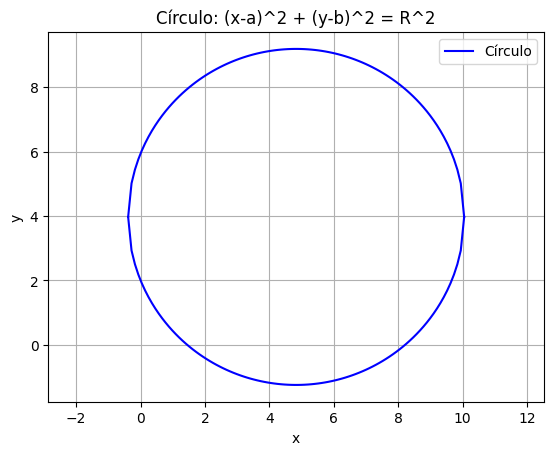

In [148]:
import matplotlib.pyplot as plt

a = solution[0]
b = solution[1]
R = solution[2]

# Definir intervalo de valores para x
x = np.linspace(a - abs(R), a + abs(R), 100)

# Calcular os valores correspondentes de y
y_positive = b + np.sqrt(R**2 - (x - a)**2)
y_negative = b - np.sqrt(R**2 - (x - a)**2)

# Plotar o círculo
plt.plot(x, y_positive, 'b', label='Círculo')
plt.plot(x, y_negative, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculo: (x-a)^2 + (y-b)^2 = R^2')
plt.grid(True)
plt.axis('equal')  # Manter proporção dos eixos iguais
plt.legend()
plt.show()